In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def evaluate_policy(env, agent):
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    terminated = False
    sum_reward = 0
    for _ in range(cfg_params["max_episode_steps"]):
        a_k = agent.optimal_action(s_k)
        s_k1, r_k, terminated, _ , info = env.step(a_k)
        sum_reward += r_k
        s_k = s_k1
        if terminated:
            break
    return sum_reward
    

In [3]:
class Agent():
    def __init__(self, action_dim: int, state_dim: int, alpha=0.01, gamma=0.9, epsilon=0.1):
        self.action_dim = action_dim
        self.state_dim = state_dim
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((state_dim, action_dim))  # 查表法 action value: Q(s, a)
    
    def select_action(self, s_k: int) -> int:
        '''use e-greedy policy'''
        self.optimal_action
        if np.random.uniform(0, 1) > self.epsilon:
            a_k = self.optimal_action(s_k)
        else:
            a_k = np.random.choice(self.action_dim)
        return a_k
    
    def optimal_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        optimal_action_list = np.where(Q_sk == np.max(Q_sk))[0]
        return np.random.choice(optimal_action_list)
    
    def other_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        other_action_list = np.where(Q_sk != np.max(Q_sk))[0]
        return np.random.choice(other_action_list)
    
    def train(self, s_k, a_k, r_k, s_k1):
        # QLearning Algorithm
        target_Q = r_k + self.gamma * np.max(self.Q[s_k1, :])
        Q_sa = self.Q[s_k, a_k]
        self.Q[s_k, a_k] += self.alpha* (target_Q - Q_sa)  

In [4]:
# parameter
cfg_params = {
    "env_name" : "CliffWalking-v0",
    "random_seed": 0,
    "max_train_steps": 1000,
    "max_episode_steps": 500,
}

env = gym.make(cfg_params["env_name"]) #  gym.make("CliffWalking-v0", render_mode="human")


Environment Model
$p(r_k\vert s_k, a_k)\\p(s_{k+1}\vert s_k, a_k)$

In [9]:
# make it as a funtion for data analysis
def main_function(alpha, gamma, epsilon=0.1):
    agent = Agent(
        action_dim=env.action_space.n,
        state_dim=env.observation_space.n,
        alpha=alpha,
        gamma=gamma,
        epsilon=epsilon)

    # training
    score_queue = []

    for k in range(cfg_params["max_train_steps"]):
        # reset the s_k
        s_k, info = env.reset(seed=cfg_params["random_seed"])
        # start one episode
        for ek in range(cfg_params["max_episode_steps"]):
            a_k = agent.select_action(s_k)
            s_k1, r_k, terminated, truncated, info = env.step(a_k)
            # key algorithm
            agent.train(s_k, a_k, r_k, s_k1)
            s_k = s_k1
            if terminated:
                break
        score = evaluate_policy(env, agent)
        score_queue.append(score)
        print(f'current step: {k}/{cfg_params["max_train_steps"]}, score: {score}')
    
    return score_queue


current step: 0/1000, score: -500
current step: 1/1000, score: -500
current step: 2/1000, score: -500
current step: 3/1000, score: -500
current step: 4/1000, score: -500
current step: 5/1000, score: -500
current step: 6/1000, score: -500
current step: 7/1000, score: -500
current step: 8/1000, score: -500
current step: 9/1000, score: -500
current step: 10/1000, score: -500
current step: 11/1000, score: -500
current step: 12/1000, score: -500
current step: 13/1000, score: -500
current step: 14/1000, score: -500
current step: 15/1000, score: -500
current step: 16/1000, score: -500
current step: 17/1000, score: -500
current step: 18/1000, score: -500
current step: 19/1000, score: -500
current step: 20/1000, score: -500
current step: 21/1000, score: -500
current step: 22/1000, score: -500
current step: 23/1000, score: -500
current step: 24/1000, score: -500
current step: 25/1000, score: -500
current step: 26/1000, score: -500
current step: 27/1000, score: -500
current step: 28/1000, score: 

current step: 321/1000, score: -13
current step: 322/1000, score: -13
current step: 323/1000, score: -13
current step: 324/1000, score: -13
current step: 325/1000, score: -13
current step: 326/1000, score: -13
current step: 327/1000, score: -13
current step: 328/1000, score: -13
current step: 329/1000, score: -13
current step: 330/1000, score: -13
current step: 331/1000, score: -13
current step: 332/1000, score: -13
current step: 333/1000, score: -13
current step: 334/1000, score: -13
current step: 335/1000, score: -13
current step: 336/1000, score: -13
current step: 337/1000, score: -13
current step: 338/1000, score: -13
current step: 339/1000, score: -13
current step: 340/1000, score: -13
current step: 341/1000, score: -13
current step: 342/1000, score: -13
current step: 343/1000, score: -13
current step: 344/1000, score: -13
current step: 345/1000, score: -13
current step: 346/1000, score: -13
current step: 347/1000, score: -13
current step: 348/1000, score: -13
current step: 349/10

current step: 645/1000, score: -13
current step: 646/1000, score: -13
current step: 647/1000, score: -13
current step: 648/1000, score: -13
current step: 649/1000, score: -13
current step: 650/1000, score: -13
current step: 651/1000, score: -13
current step: 652/1000, score: -13
current step: 653/1000, score: -13
current step: 654/1000, score: -13
current step: 655/1000, score: -13
current step: 656/1000, score: -13
current step: 657/1000, score: -13
current step: 658/1000, score: -13
current step: 659/1000, score: -13
current step: 660/1000, score: -13
current step: 661/1000, score: -13
current step: 662/1000, score: -13
current step: 663/1000, score: -13
current step: 664/1000, score: -13
current step: 665/1000, score: -13
current step: 666/1000, score: -13
current step: 667/1000, score: -13
current step: 668/1000, score: -13
current step: 669/1000, score: -13
current step: 670/1000, score: -13
current step: 671/1000, score: -13
current step: 672/1000, score: -13
current step: 673/10

current step: 934/1000, score: -13
current step: 935/1000, score: -13
current step: 936/1000, score: -13
current step: 937/1000, score: -13
current step: 938/1000, score: -13
current step: 939/1000, score: -13
current step: 940/1000, score: -13
current step: 941/1000, score: -13
current step: 942/1000, score: -13
current step: 943/1000, score: -13
current step: 944/1000, score: -13
current step: 945/1000, score: -13
current step: 946/1000, score: -13
current step: 947/1000, score: -13
current step: 948/1000, score: -13
current step: 949/1000, score: -13
current step: 950/1000, score: -13
current step: 951/1000, score: -13
current step: 952/1000, score: -13
current step: 953/1000, score: -13
current step: 954/1000, score: -13
current step: 955/1000, score: -13
current step: 956/1000, score: -13
current step: 957/1000, score: -13
current step: 958/1000, score: -13
current step: 959/1000, score: -13
current step: 960/1000, score: -13
current step: 961/1000, score: -13
current step: 962/10

current step: 306/1000, score: -13
current step: 307/1000, score: -13
current step: 308/1000, score: -13
current step: 309/1000, score: -13
current step: 310/1000, score: -13
current step: 311/1000, score: -13
current step: 312/1000, score: -13
current step: 313/1000, score: -13
current step: 314/1000, score: -13
current step: 315/1000, score: -13
current step: 316/1000, score: -13
current step: 317/1000, score: -13
current step: 318/1000, score: -13
current step: 319/1000, score: -13
current step: 320/1000, score: -13
current step: 321/1000, score: -13
current step: 322/1000, score: -13
current step: 323/1000, score: -13
current step: 324/1000, score: -13
current step: 325/1000, score: -13
current step: 326/1000, score: -13
current step: 327/1000, score: -13
current step: 328/1000, score: -13
current step: 329/1000, score: -13
current step: 330/1000, score: -13
current step: 331/1000, score: -13
current step: 332/1000, score: -13
current step: 333/1000, score: -13
current step: 334/10

current step: 632/1000, score: -13
current step: 633/1000, score: -13
current step: 634/1000, score: -13
current step: 635/1000, score: -13
current step: 636/1000, score: -13
current step: 637/1000, score: -13
current step: 638/1000, score: -13
current step: 639/1000, score: -13
current step: 640/1000, score: -13
current step: 641/1000, score: -13
current step: 642/1000, score: -13
current step: 643/1000, score: -13
current step: 644/1000, score: -13
current step: 645/1000, score: -13
current step: 646/1000, score: -13
current step: 647/1000, score: -13
current step: 648/1000, score: -13
current step: 649/1000, score: -13
current step: 650/1000, score: -13
current step: 651/1000, score: -13
current step: 652/1000, score: -13
current step: 653/1000, score: -13
current step: 654/1000, score: -13
current step: 655/1000, score: -13
current step: 656/1000, score: -13
current step: 657/1000, score: -13
current step: 658/1000, score: -13
current step: 659/1000, score: -13
current step: 660/10

current step: 933/1000, score: -13
current step: 934/1000, score: -13
current step: 935/1000, score: -13
current step: 936/1000, score: -13
current step: 937/1000, score: -13
current step: 938/1000, score: -13
current step: 939/1000, score: -13
current step: 940/1000, score: -13
current step: 941/1000, score: -13
current step: 942/1000, score: -13
current step: 943/1000, score: -13
current step: 944/1000, score: -13
current step: 945/1000, score: -13
current step: 946/1000, score: -13
current step: 947/1000, score: -13
current step: 948/1000, score: -13
current step: 949/1000, score: -13
current step: 950/1000, score: -13
current step: 951/1000, score: -13
current step: 952/1000, score: -13
current step: 953/1000, score: -13
current step: 954/1000, score: -13
current step: 955/1000, score: -13
current step: 956/1000, score: -13
current step: 957/1000, score: -13
current step: 958/1000, score: -13
current step: 959/1000, score: -13
current step: 960/1000, score: -13
current step: 961/10

current step: 244/1000, score: -13
current step: 245/1000, score: -13
current step: 246/1000, score: -13
current step: 247/1000, score: -13
current step: 248/1000, score: -13
current step: 249/1000, score: -13
current step: 250/1000, score: -13
current step: 251/1000, score: -13
current step: 252/1000, score: -13
current step: 253/1000, score: -13
current step: 254/1000, score: -13
current step: 255/1000, score: -13
current step: 256/1000, score: -13
current step: 257/1000, score: -13
current step: 258/1000, score: -13
current step: 259/1000, score: -13
current step: 260/1000, score: -13
current step: 261/1000, score: -13
current step: 262/1000, score: -13
current step: 263/1000, score: -13
current step: 264/1000, score: -13
current step: 265/1000, score: -13
current step: 266/1000, score: -13
current step: 267/1000, score: -13
current step: 268/1000, score: -13
current step: 269/1000, score: -13
current step: 270/1000, score: -13
current step: 271/1000, score: -13
current step: 272/10

current step: 526/1000, score: -13
current step: 527/1000, score: -13
current step: 528/1000, score: -13
current step: 529/1000, score: -13
current step: 530/1000, score: -13
current step: 531/1000, score: -13
current step: 532/1000, score: -13
current step: 533/1000, score: -13
current step: 534/1000, score: -13
current step: 535/1000, score: -13
current step: 536/1000, score: -13
current step: 537/1000, score: -13
current step: 538/1000, score: -13
current step: 539/1000, score: -13
current step: 540/1000, score: -13
current step: 541/1000, score: -13
current step: 542/1000, score: -13
current step: 543/1000, score: -13
current step: 544/1000, score: -13
current step: 545/1000, score: -13
current step: 546/1000, score: -13
current step: 547/1000, score: -13
current step: 548/1000, score: -13
current step: 549/1000, score: -13
current step: 550/1000, score: -13
current step: 551/1000, score: -13
current step: 552/1000, score: -13
current step: 553/1000, score: -13
current step: 554/10

current step: 820/1000, score: -13
current step: 821/1000, score: -13
current step: 822/1000, score: -13
current step: 823/1000, score: -13
current step: 824/1000, score: -13
current step: 825/1000, score: -13
current step: 826/1000, score: -13
current step: 827/1000, score: -13
current step: 828/1000, score: -13
current step: 829/1000, score: -13
current step: 830/1000, score: -13
current step: 831/1000, score: -13
current step: 832/1000, score: -13
current step: 833/1000, score: -13
current step: 834/1000, score: -13
current step: 835/1000, score: -13
current step: 836/1000, score: -13
current step: 837/1000, score: -13
current step: 838/1000, score: -13
current step: 839/1000, score: -13
current step: 840/1000, score: -13
current step: 841/1000, score: -13
current step: 842/1000, score: -13
current step: 843/1000, score: -13
current step: 844/1000, score: -13
current step: 845/1000, score: -13
current step: 846/1000, score: -13
current step: 847/1000, score: -13
current step: 848/10

current step: 65/1000, score: -500
current step: 66/1000, score: -500
current step: 67/1000, score: -500
current step: 68/1000, score: -500
current step: 69/1000, score: -500
current step: 70/1000, score: -500
current step: 71/1000, score: -500
current step: 72/1000, score: -500
current step: 73/1000, score: -500
current step: 74/1000, score: -500
current step: 75/1000, score: -500
current step: 76/1000, score: -500
current step: 77/1000, score: -500
current step: 78/1000, score: -500
current step: 79/1000, score: -500
current step: 80/1000, score: -500
current step: 81/1000, score: -500
current step: 82/1000, score: -500
current step: 83/1000, score: -500
current step: 84/1000, score: -500
current step: 85/1000, score: -500
current step: 86/1000, score: -500
current step: 87/1000, score: -500
current step: 88/1000, score: -500
current step: 89/1000, score: -500
current step: 90/1000, score: -500
current step: 91/1000, score: -500
current step: 92/1000, score: -500
current step: 93/100

current step: 307/1000, score: -13
current step: 308/1000, score: -13
current step: 309/1000, score: -13
current step: 310/1000, score: -13
current step: 311/1000, score: -13
current step: 312/1000, score: -13
current step: 313/1000, score: -13
current step: 314/1000, score: -13
current step: 315/1000, score: -13
current step: 316/1000, score: -13
current step: 317/1000, score: -13
current step: 318/1000, score: -13
current step: 319/1000, score: -13
current step: 320/1000, score: -13
current step: 321/1000, score: -13
current step: 322/1000, score: -13
current step: 323/1000, score: -13
current step: 324/1000, score: -13
current step: 325/1000, score: -13
current step: 326/1000, score: -13
current step: 327/1000, score: -13
current step: 328/1000, score: -13
current step: 329/1000, score: -13
current step: 330/1000, score: -13
current step: 331/1000, score: -13
current step: 332/1000, score: -13
current step: 333/1000, score: -13
current step: 334/1000, score: -13
current step: 335/10

current step: 610/1000, score: -13
current step: 611/1000, score: -13
current step: 612/1000, score: -13
current step: 613/1000, score: -13
current step: 614/1000, score: -13
current step: 615/1000, score: -13
current step: 616/1000, score: -13
current step: 617/1000, score: -13
current step: 618/1000, score: -13
current step: 619/1000, score: -13
current step: 620/1000, score: -13
current step: 621/1000, score: -13
current step: 622/1000, score: -13
current step: 623/1000, score: -13
current step: 624/1000, score: -13
current step: 625/1000, score: -13
current step: 626/1000, score: -13
current step: 627/1000, score: -13
current step: 628/1000, score: -13
current step: 629/1000, score: -13
current step: 630/1000, score: -13
current step: 631/1000, score: -13
current step: 632/1000, score: -13
current step: 633/1000, score: -13
current step: 634/1000, score: -13
current step: 635/1000, score: -13
current step: 636/1000, score: -13
current step: 637/1000, score: -13
current step: 638/10

current step: 913/1000, score: -13
current step: 914/1000, score: -13
current step: 915/1000, score: -13
current step: 916/1000, score: -13
current step: 917/1000, score: -13
current step: 918/1000, score: -13
current step: 919/1000, score: -13
current step: 920/1000, score: -13
current step: 921/1000, score: -13
current step: 922/1000, score: -13
current step: 923/1000, score: -13
current step: 924/1000, score: -13
current step: 925/1000, score: -13
current step: 926/1000, score: -13
current step: 927/1000, score: -13
current step: 928/1000, score: -13
current step: 929/1000, score: -13
current step: 930/1000, score: -13
current step: 931/1000, score: -13
current step: 932/1000, score: -13
current step: 933/1000, score: -13
current step: 934/1000, score: -13
current step: 935/1000, score: -13
current step: 936/1000, score: -13
current step: 937/1000, score: -13
current step: 938/1000, score: -13
current step: 939/1000, score: -13
current step: 940/1000, score: -13
current step: 941/10

current step: 148/1000, score: -500
current step: 149/1000, score: -500
current step: 150/1000, score: -13
current step: 151/1000, score: -13
current step: 152/1000, score: -13
current step: 153/1000, score: -13
current step: 154/1000, score: -13
current step: 155/1000, score: -13
current step: 156/1000, score: -13
current step: 157/1000, score: -500
current step: 158/1000, score: -13
current step: 159/1000, score: -13
current step: 160/1000, score: -13
current step: 161/1000, score: -13
current step: 162/1000, score: -13
current step: 163/1000, score: -13
current step: 164/1000, score: -13
current step: 165/1000, score: -13
current step: 166/1000, score: -13
current step: 167/1000, score: -13
current step: 168/1000, score: -13
current step: 169/1000, score: -13
current step: 170/1000, score: -13
current step: 171/1000, score: -13
current step: 172/1000, score: -13
current step: 173/1000, score: -13
current step: 174/1000, score: -13
current step: 175/1000, score: -13
current step: 176

current step: 469/1000, score: -13
current step: 470/1000, score: -13
current step: 471/1000, score: -13
current step: 472/1000, score: -13
current step: 473/1000, score: -13
current step: 474/1000, score: -13
current step: 475/1000, score: -13
current step: 476/1000, score: -13
current step: 477/1000, score: -13
current step: 478/1000, score: -13
current step: 479/1000, score: -13
current step: 480/1000, score: -13
current step: 481/1000, score: -13
current step: 482/1000, score: -13
current step: 483/1000, score: -13
current step: 484/1000, score: -13
current step: 485/1000, score: -13
current step: 486/1000, score: -13
current step: 487/1000, score: -13
current step: 488/1000, score: -13
current step: 489/1000, score: -13
current step: 490/1000, score: -13
current step: 491/1000, score: -13
current step: 492/1000, score: -13
current step: 493/1000, score: -13
current step: 494/1000, score: -13
current step: 495/1000, score: -13
current step: 496/1000, score: -13
current step: 497/10

current step: 792/1000, score: -13
current step: 793/1000, score: -13
current step: 794/1000, score: -13
current step: 795/1000, score: -13
current step: 796/1000, score: -13
current step: 797/1000, score: -13
current step: 798/1000, score: -13
current step: 799/1000, score: -13
current step: 800/1000, score: -13
current step: 801/1000, score: -13
current step: 802/1000, score: -13
current step: 803/1000, score: -13
current step: 804/1000, score: -13
current step: 805/1000, score: -13
current step: 806/1000, score: -13
current step: 807/1000, score: -13
current step: 808/1000, score: -13
current step: 809/1000, score: -13
current step: 810/1000, score: -13
current step: 811/1000, score: -13
current step: 812/1000, score: -13
current step: 813/1000, score: -13
current step: 814/1000, score: -13
current step: 815/1000, score: -13
current step: 816/1000, score: -13
current step: 817/1000, score: -13
current step: 818/1000, score: -13
current step: 819/1000, score: -13
current step: 820/10

/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-pa

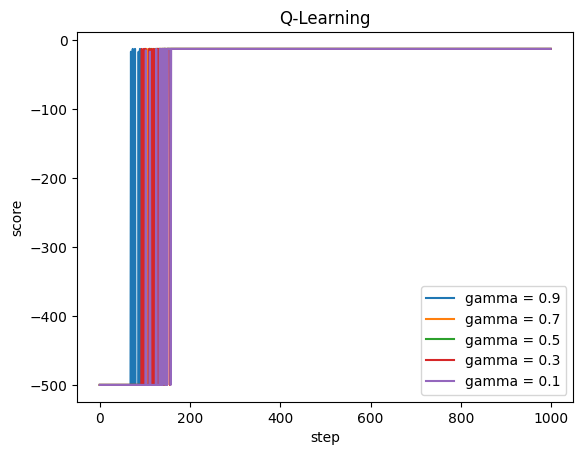

In [10]:
# data analysis

alpha_list = [0.2, 0.4, 0.6, 0.8]  # w_k1 = wk + alpha * TD_Error

gamma_list = [0.9, 0.7, 0.5, 0.3, 0.1]  # discounted rate

# analysis gamma (alpha = 0.2)
plt.figure()
for gamma in gamma_list:
    score_queue = main_function(alpha = 0.2, gamma=gamma)
    plt.plot(score_queue, label=f'gamma = {gamma}')
plt.ylabel('score')
plt.xlabel('step')
plt.title('Q-Learning')
plt.legend()


current step: 0/1000, score: -500
current step: 1/1000, score: -500
current step: 2/1000, score: -500
current step: 3/1000, score: -500
current step: 4/1000, score: -500
current step: 5/1000, score: -500
current step: 6/1000, score: -500
current step: 7/1000, score: -500
current step: 8/1000, score: -500
current step: 9/1000, score: -500
current step: 10/1000, score: -500
current step: 11/1000, score: -500
current step: 12/1000, score: -500
current step: 13/1000, score: -500
current step: 14/1000, score: -500
current step: 15/1000, score: -500
current step: 16/1000, score: -500
current step: 17/1000, score: -500
current step: 18/1000, score: -500
current step: 19/1000, score: -500
current step: 20/1000, score: -500
current step: 21/1000, score: -500
current step: 22/1000, score: -500
current step: 23/1000, score: -500
current step: 24/1000, score: -500
current step: 25/1000, score: -500
current step: 26/1000, score: -500
current step: 27/1000, score: -500
current step: 28/1000, score: 

current step: 323/1000, score: -13
current step: 324/1000, score: -13
current step: 325/1000, score: -13
current step: 326/1000, score: -13
current step: 327/1000, score: -13
current step: 328/1000, score: -13
current step: 329/1000, score: -13
current step: 330/1000, score: -13
current step: 331/1000, score: -13
current step: 332/1000, score: -13
current step: 333/1000, score: -13
current step: 334/1000, score: -13
current step: 335/1000, score: -13
current step: 336/1000, score: -13
current step: 337/1000, score: -13
current step: 338/1000, score: -13
current step: 339/1000, score: -13
current step: 340/1000, score: -13
current step: 341/1000, score: -13
current step: 342/1000, score: -13
current step: 343/1000, score: -13
current step: 344/1000, score: -13
current step: 345/1000, score: -13
current step: 346/1000, score: -13
current step: 347/1000, score: -13
current step: 348/1000, score: -13
current step: 349/1000, score: -13
current step: 350/1000, score: -13
current step: 351/10

current step: 626/1000, score: -13
current step: 627/1000, score: -13
current step: 628/1000, score: -13
current step: 629/1000, score: -13
current step: 630/1000, score: -13
current step: 631/1000, score: -13
current step: 632/1000, score: -13
current step: 633/1000, score: -13
current step: 634/1000, score: -13
current step: 635/1000, score: -13
current step: 636/1000, score: -13
current step: 637/1000, score: -13
current step: 638/1000, score: -13
current step: 639/1000, score: -13
current step: 640/1000, score: -13
current step: 641/1000, score: -13
current step: 642/1000, score: -13
current step: 643/1000, score: -13
current step: 644/1000, score: -13
current step: 645/1000, score: -13
current step: 646/1000, score: -13
current step: 647/1000, score: -13
current step: 648/1000, score: -13
current step: 649/1000, score: -13
current step: 650/1000, score: -13
current step: 651/1000, score: -13
current step: 652/1000, score: -13
current step: 653/1000, score: -13
current step: 654/10

current step: 945/1000, score: -13
current step: 946/1000, score: -13
current step: 947/1000, score: -13
current step: 948/1000, score: -13
current step: 949/1000, score: -13
current step: 950/1000, score: -13
current step: 951/1000, score: -13
current step: 952/1000, score: -13
current step: 953/1000, score: -13
current step: 954/1000, score: -13
current step: 955/1000, score: -13
current step: 956/1000, score: -13
current step: 957/1000, score: -13
current step: 958/1000, score: -13
current step: 959/1000, score: -13
current step: 960/1000, score: -13
current step: 961/1000, score: -13
current step: 962/1000, score: -13
current step: 963/1000, score: -13
current step: 964/1000, score: -13
current step: 965/1000, score: -13
current step: 966/1000, score: -13
current step: 967/1000, score: -13
current step: 968/1000, score: -13
current step: 969/1000, score: -13
current step: 970/1000, score: -13
current step: 971/1000, score: -13
current step: 972/1000, score: -13
current step: 973/10

current step: 309/1000, score: -13
current step: 310/1000, score: -13
current step: 311/1000, score: -13
current step: 312/1000, score: -13
current step: 313/1000, score: -13
current step: 314/1000, score: -13
current step: 315/1000, score: -13
current step: 316/1000, score: -13
current step: 317/1000, score: -13
current step: 318/1000, score: -13
current step: 319/1000, score: -13
current step: 320/1000, score: -13
current step: 321/1000, score: -13
current step: 322/1000, score: -13
current step: 323/1000, score: -13
current step: 324/1000, score: -13
current step: 325/1000, score: -13
current step: 326/1000, score: -13
current step: 327/1000, score: -13
current step: 328/1000, score: -13
current step: 329/1000, score: -13
current step: 330/1000, score: -13
current step: 331/1000, score: -13
current step: 332/1000, score: -13
current step: 333/1000, score: -13
current step: 334/1000, score: -13
current step: 335/1000, score: -13
current step: 336/1000, score: -13
current step: 337/10

current step: 622/1000, score: -13
current step: 623/1000, score: -13
current step: 624/1000, score: -13
current step: 625/1000, score: -13
current step: 626/1000, score: -13
current step: 627/1000, score: -13
current step: 628/1000, score: -13
current step: 629/1000, score: -13
current step: 630/1000, score: -13
current step: 631/1000, score: -13
current step: 632/1000, score: -13
current step: 633/1000, score: -13
current step: 634/1000, score: -13
current step: 635/1000, score: -13
current step: 636/1000, score: -13
current step: 637/1000, score: -13
current step: 638/1000, score: -13
current step: 639/1000, score: -13
current step: 640/1000, score: -13
current step: 641/1000, score: -13
current step: 642/1000, score: -13
current step: 643/1000, score: -13
current step: 644/1000, score: -13
current step: 645/1000, score: -13
current step: 646/1000, score: -13
current step: 647/1000, score: -13
current step: 648/1000, score: -13
current step: 649/1000, score: -13
current step: 650/10

current step: 935/1000, score: -13
current step: 936/1000, score: -13
current step: 937/1000, score: -13
current step: 938/1000, score: -13
current step: 939/1000, score: -13
current step: 940/1000, score: -13
current step: 941/1000, score: -13
current step: 942/1000, score: -13
current step: 943/1000, score: -13
current step: 944/1000, score: -13
current step: 945/1000, score: -13
current step: 946/1000, score: -13
current step: 947/1000, score: -13
current step: 948/1000, score: -13
current step: 949/1000, score: -13
current step: 950/1000, score: -13
current step: 951/1000, score: -13
current step: 952/1000, score: -13
current step: 953/1000, score: -13
current step: 954/1000, score: -13
current step: 955/1000, score: -13
current step: 956/1000, score: -13
current step: 957/1000, score: -13
current step: 958/1000, score: -13
current step: 959/1000, score: -13
current step: 960/1000, score: -13
current step: 961/1000, score: -13
current step: 962/1000, score: -13
current step: 963/10

current step: 215/1000, score: -13
current step: 216/1000, score: -13
current step: 217/1000, score: -13
current step: 218/1000, score: -13
current step: 219/1000, score: -13
current step: 220/1000, score: -13
current step: 221/1000, score: -13
current step: 222/1000, score: -13
current step: 223/1000, score: -13
current step: 224/1000, score: -13
current step: 225/1000, score: -13
current step: 226/1000, score: -13
current step: 227/1000, score: -13
current step: 228/1000, score: -13
current step: 229/1000, score: -13
current step: 230/1000, score: -13
current step: 231/1000, score: -13
current step: 232/1000, score: -13
current step: 233/1000, score: -13
current step: 234/1000, score: -13
current step: 235/1000, score: -13
current step: 236/1000, score: -13
current step: 237/1000, score: -13
current step: 238/1000, score: -13
current step: 239/1000, score: -13
current step: 240/1000, score: -13
current step: 241/1000, score: -13
current step: 242/1000, score: -13
current step: 243/10

current step: 552/1000, score: -13
current step: 553/1000, score: -13
current step: 554/1000, score: -13
current step: 555/1000, score: -13
current step: 556/1000, score: -13
current step: 557/1000, score: -13
current step: 558/1000, score: -13
current step: 559/1000, score: -13
current step: 560/1000, score: -13
current step: 561/1000, score: -13
current step: 562/1000, score: -13
current step: 563/1000, score: -13
current step: 564/1000, score: -13
current step: 565/1000, score: -13
current step: 566/1000, score: -13
current step: 567/1000, score: -13
current step: 568/1000, score: -13
current step: 569/1000, score: -13
current step: 570/1000, score: -13
current step: 571/1000, score: -13
current step: 572/1000, score: -13
current step: 573/1000, score: -13
current step: 574/1000, score: -13
current step: 575/1000, score: -13
current step: 576/1000, score: -13
current step: 577/1000, score: -13
current step: 578/1000, score: -13
current step: 579/1000, score: -13
current step: 580/10

current step: 850/1000, score: -13
current step: 851/1000, score: -13
current step: 852/1000, score: -13
current step: 853/1000, score: -13
current step: 854/1000, score: -13
current step: 855/1000, score: -13
current step: 856/1000, score: -13
current step: 857/1000, score: -13
current step: 858/1000, score: -13
current step: 859/1000, score: -13
current step: 860/1000, score: -13
current step: 861/1000, score: -13
current step: 862/1000, score: -13
current step: 863/1000, score: -13
current step: 864/1000, score: -13
current step: 865/1000, score: -13
current step: 866/1000, score: -13
current step: 867/1000, score: -13
current step: 868/1000, score: -13
current step: 869/1000, score: -13
current step: 870/1000, score: -13
current step: 871/1000, score: -13
current step: 872/1000, score: -13
current step: 873/1000, score: -13
current step: 874/1000, score: -13
current step: 875/1000, score: -13
current step: 876/1000, score: -13
current step: 877/1000, score: -13
current step: 878/10

current step: 169/1000, score: -13
current step: 170/1000, score: -13
current step: 171/1000, score: -13
current step: 172/1000, score: -13
current step: 173/1000, score: -13
current step: 174/1000, score: -13
current step: 175/1000, score: -13
current step: 176/1000, score: -13
current step: 177/1000, score: -13
current step: 178/1000, score: -13
current step: 179/1000, score: -13
current step: 180/1000, score: -13
current step: 181/1000, score: -13
current step: 182/1000, score: -13
current step: 183/1000, score: -13
current step: 184/1000, score: -13
current step: 185/1000, score: -13
current step: 186/1000, score: -13
current step: 187/1000, score: -13
current step: 188/1000, score: -13
current step: 189/1000, score: -13
current step: 190/1000, score: -13
current step: 191/1000, score: -13
current step: 192/1000, score: -13
current step: 193/1000, score: -13
current step: 194/1000, score: -13
current step: 195/1000, score: -13
current step: 196/1000, score: -13
current step: 197/10

current step: 481/1000, score: -13
current step: 482/1000, score: -13
current step: 483/1000, score: -13
current step: 484/1000, score: -13
current step: 485/1000, score: -13
current step: 486/1000, score: -13
current step: 487/1000, score: -13
current step: 488/1000, score: -13
current step: 489/1000, score: -13
current step: 490/1000, score: -13
current step: 491/1000, score: -13
current step: 492/1000, score: -13
current step: 493/1000, score: -13
current step: 494/1000, score: -13
current step: 495/1000, score: -13
current step: 496/1000, score: -13
current step: 497/1000, score: -13
current step: 498/1000, score: -13
current step: 499/1000, score: -13
current step: 500/1000, score: -13
current step: 501/1000, score: -13
current step: 502/1000, score: -13
current step: 503/1000, score: -13
current step: 504/1000, score: -13
current step: 505/1000, score: -13
current step: 506/1000, score: -13
current step: 507/1000, score: -13
current step: 508/1000, score: -13
current step: 509/10

current step: 781/1000, score: -13
current step: 782/1000, score: -13
current step: 783/1000, score: -13
current step: 784/1000, score: -13
current step: 785/1000, score: -13
current step: 786/1000, score: -13
current step: 787/1000, score: -13
current step: 788/1000, score: -13
current step: 789/1000, score: -13
current step: 790/1000, score: -13
current step: 791/1000, score: -13
current step: 792/1000, score: -13
current step: 793/1000, score: -13
current step: 794/1000, score: -13
current step: 795/1000, score: -13
current step: 796/1000, score: -13
current step: 797/1000, score: -13
current step: 798/1000, score: -13
current step: 799/1000, score: -13
current step: 800/1000, score: -13
current step: 801/1000, score: -13
current step: 802/1000, score: -13
current step: 803/1000, score: -13
current step: 804/1000, score: -13
current step: 805/1000, score: -13
current step: 806/1000, score: -13
current step: 807/1000, score: -13
current step: 808/1000, score: -13
current step: 809/10

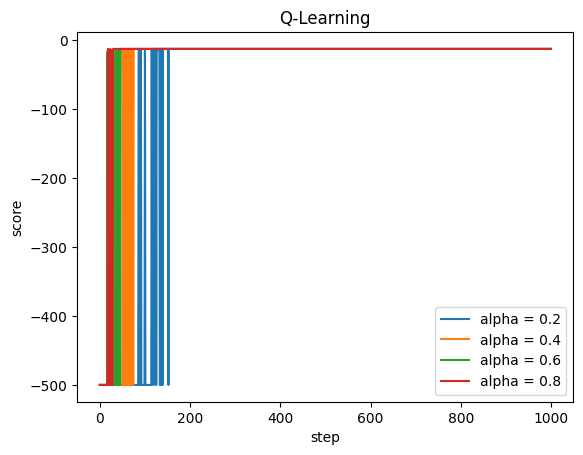

In [11]:
# analysis alpha (gamma = 0.9)
plt.figure()
for alpha in alpha_list:
    score_queue = main_function(alpha = alpha, gamma=0.9)
    plt.plot(score_queue, label=f'alpha = {alpha}')
plt.ylabel('score')
plt.xlabel('step')
plt.title('Q-Learning')
plt.legend()

/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/henry/miniconda3/envs/learning/lib/python3.11/site-pa

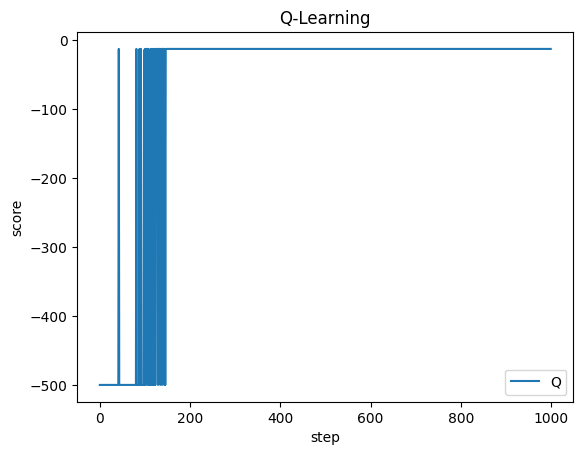

In [6]:
# plot
plt.figure()
plt.plot(score_queue, label="Q")

plt.ylabel('score')
plt.xlabel('step')
plt.title('Q-Learning')
plt.legend()


In [12]:
# play
evaluate_env = gym.make(cfg_params["env_name"], render_mode="human")
evaluate_policy(evaluate_env, agent)

/home/henry/miniconda3/envs/learning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-13